In [1]:
from google.colab import files
uploaded = files.upload()


Saving heart.csv to heart.csv


Shape: (1025, 14)

Columns: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

First few rows:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0



Model Performance:
Accuracy: 0.8878048780487805

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.83      0.88       102
           1       0.85      0.94      0.89       103

    accuracy                           0.89       205
   macro avg       0.89      0.89      0.89       205
weighted avg       0.89      0.89      0.89       205



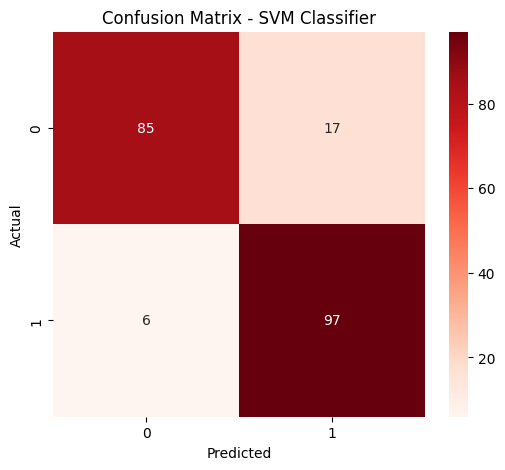

In [5]:
# --- Support Vector Machine (SVM) ---
# --- Import Libraries ---
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# --- Load dataset ---
df = pd.read_csv("heart.csv")

# --- Quick overview ---
print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nFirst few rows:")
display(df.head())

# --- Encode categorical columns automatically ---
df_encoded = pd.get_dummies(df, drop_first=True)

# --- Define target and features ---
# Change 'target' if your dataset uses a different column for labels
target_column = 'target'
X = df_encoded.drop(columns=[target_column])
y = df_encoded[target_column]

# --- Split data into training and test sets ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --- Standardize features (important for SVM) ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Train SVM model ---
model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
model.fit(X_train_scaled, y_train)

# --- Predict on test set ---
y_pred = model.predict(X_test_scaled)

# --- Evaluate the model ---
print("\nModel Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# --- Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix - SVM Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Shape: (1025, 14)

Columns: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

First few rows:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0



Model Performance (k=5):
Accuracy: 0.8341463414634146

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.77      0.82       102
           1       0.80      0.89      0.84       103

    accuracy                           0.83       205
   macro avg       0.84      0.83      0.83       205
weighted avg       0.84      0.83      0.83       205



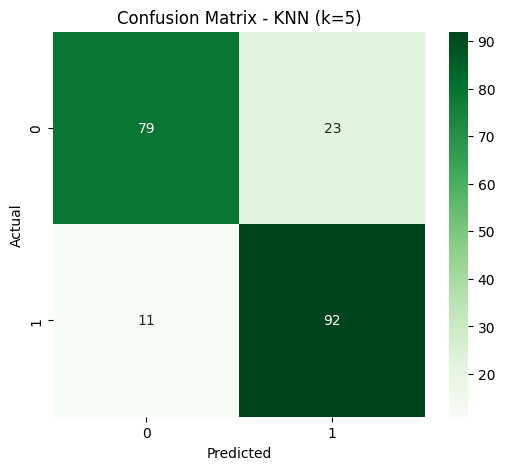

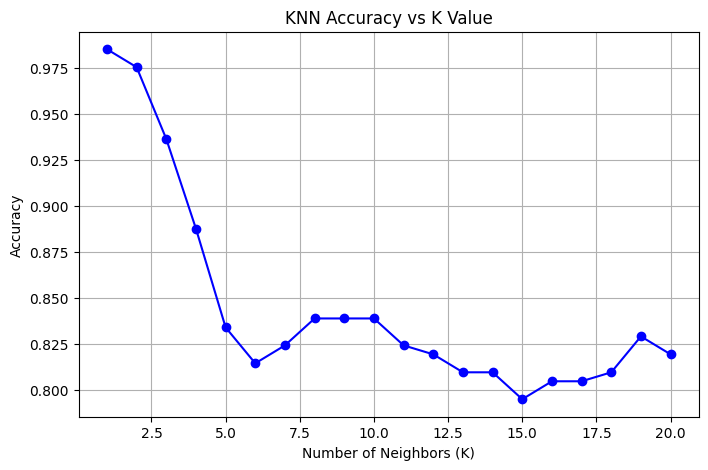


Best K value: 1 with Accuracy = 0.9854


In [6]:
# ---KNN ---
# --- Import Libraries ---
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# --- Load dataset ---
df = pd.read_csv("heart.csv")

# --- Quick overview ---
print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nFirst few rows:")
display(df.head())

# --- Encode categorical columns automatically ---
df_encoded = pd.get_dummies(df, drop_first=True)

# --- Define target and features ---
# Change 'target' if your dataset uses a different name for label column
target_column = 'target'
X = df_encoded.drop(columns=[target_column])
y = df_encoded[target_column]

# --- Split data ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --- Scale features (important for KNN) ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Train initial KNN model ---
k = 5  # you can change this value
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train_scaled, y_train)

# --- Predictions ---
y_pred = model.predict(X_test_scaled)

# --- Evaluate model ---
print(f"\nModel Performance (k={k}):")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# --- Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title(f"Confusion Matrix - KNN (k={k})")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# --- Find best k value ---
accuracy_scores = []
k_values = range(1, 21)
for i in k_values:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled, y_train)
    y_pred_i = knn.predict(X_test_scaled)
    accuracy_scores.append(accuracy_score(y_test, y_pred_i))

plt.figure(figsize=(8,5))
plt.plot(k_values, accuracy_scores, marker='o', color='blue')
plt.title("KNN Accuracy vs K Value")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

best_k = k_values[np.argmax(accuracy_scores)]
print(f"\nBest K value: {best_k} with Accuracy = {max(accuracy_scores):.4f}")


Shape: (1025, 14)

Columns: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

First few rows:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5192 - loss: 0.7116 - val_accuracy: 0.6646 - val_loss: 0.6369
Epoch 2/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7398 - loss: 0.5819 - val_accuracy: 0.7683 - val_loss: 0.5533
Epoch 3/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8231 - loss: 0.4723 - val_accuracy: 0.8110 - val_loss: 0.4863
Epoch 4/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8350 - loss: 0.3968 - val_accuracy: 0.7866 - val_loss: 0.4496
Epoch 5/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8812 - loss: 0.3228 - val_accuracy: 0.8232 - val_loss: 0.4251
Epoch 6/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8805 - loss: 0.3059 - val_accuracy: 0.8232 - val_loss: 0.4114
Epoch 7/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8850 - loss: 0.3205 - val_accuracy: 0.8171 - val_loss: 0.4045
Epoch 8/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8778 - loss: 0.2973 - val_accuracy: 0.8293 - val_loss:

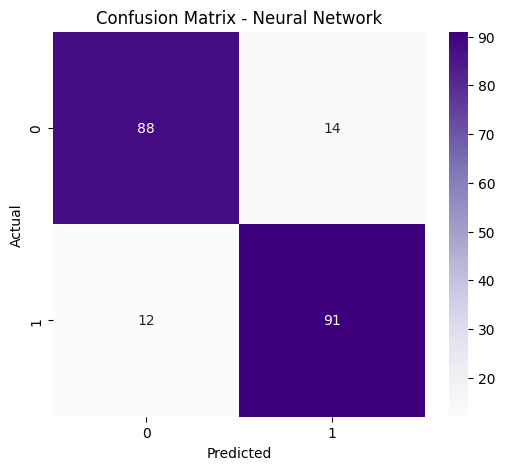

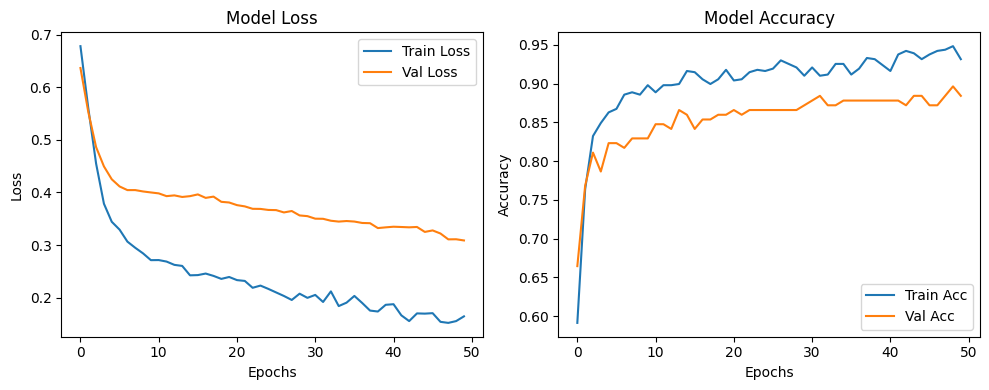

In [7]:
# --- Neural Network ---
# --- Import Libraries ---
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# --- Load dataset ---
df = pd.read_csv("heart.csv")

# --- Quick overview ---
print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nFirst few rows:")
display(df.head())

# --- Encode categorical columns automatically ---
df_encoded = pd.get_dummies(df, drop_first=True)

# --- Define target and features ---
target_column = 'target'   # change if your label column has a different name
X = df_encoded.drop(columns=[target_column])
y = df_encoded[target_column]

# --- Split data ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --- Scale features ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Build Neural Network ---
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # sigmoid for binary classification
])

# --- Compile model ---
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# --- Train model ---
history = model.fit(
    X_train_scaled, y_train,
    epochs=50, batch_size=16,
    validation_split=0.2,
    verbose=1
)

# --- Evaluate model ---
loss, accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"\nTest Accuracy: {accuracy:.4f}")

# --- Predictions ---
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype("int32")

# --- Classification Report & Confusion Matrix ---
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples',
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix - Neural Network")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# --- Plot training history ---
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()
